In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
print (tf.__version__)

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
x = tf.random_uniform((1,10), 1, 10)

In [ ]:
type (x)

In [ ]:
a = tf.Variable(tf.random_normal((1,10), 5, 1))

In [ ]:
type (a)

In [ ]:
sess.run(x)

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
sess.run(a)

In [ ]:
b = tf.placeholder(tf.float32)

In [ ]:
sess.run(b, feed_dict={b: sess.run(x)})

# Matplotlib

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import wfdb
from wfdb import processing

In [ ]:
recs = ["100", "118", "217"]

In [ ]:
dataset = {}
for rec_no in recs:
    data = "../dataset/mitdb/"+rec_no
    result_to = "../dataset/images/"+rec_no
    record = wfdb.rdrecord(data, sampto=3600, channels=[0])
    rqrs = processing.xqrs_detect(record.p_signal[:,0], record.fs)
    figure = []
    for i in rqrs:
        start = i
        stop = i+200
        if start<0: 
            start=0
        if stop>3600:
            stop=3600
        temp_rec = wfdb.rdrecord(data, sampfrom=start,sampto=stop, channels=[0])
        figure.append(wfdb.plot_wfdb(record=temp_rec, title=i, return_fig=True))
        figure[-1].savefig(result_to + "/" + str(i) + ".png")
    dataset[rec_no] = figure

# Classification

In [42]:
import os, glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [43]:
train_path = '../dataset/images/'
classes = ["100", "118", "217"]

In [44]:
files = []
for fld in classes:
    path = os.path.join(train_path, fld, '*g')
    files.append(glob.glob(path))

In [45]:
img = mpimg.imread(files[0][0])

In [46]:
from PIL import Image

In [47]:
img = Image.open(files[0][0])

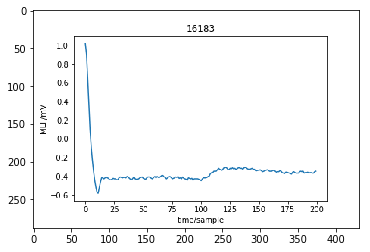

In [48]:
plt.imshow(img)

In [49]:
import tensorflow as tf

In [50]:
image_string = tf.read_file(files[0][0])

In [51]:
image = tf.image.decode_png(image_string)

In [52]:
image

<tf.Tensor 'DecodePng:0' shape=(?, ?, ?) dtype=uint8>

In [53]:
with tf.Session() as sess:
    result = sess.run(image)

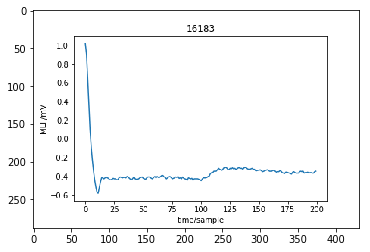

In [54]:
plt.imshow(result)

# OpenCV

In [55]:
import cv2

In [56]:
img = cv2.imread(files[0][1],1)

In [57]:
img.shape

(288, 432, 3)

In [58]:
result.shape

(288, 432, 4)

In [59]:
cv2.imshow("img",crop)
cv2.waitKey(0); cv2.destroyAllWindows()

NameError: name 'crop' is not defined

In [60]:
crop = img[288-250:288-35, 55:390]

In [61]:
crop.shape

(215, 335, 3)

# Import dataset

In [35]:
import os, glob, cv2
import numpy as np

In [32]:
train_path = '../dataset/images/'
classes = ["100", "118", "217"]

In [37]:
def import_training_data_cnn(train_path):
    images = []
    labels = []
    classes = [lists for lists in os.walk(train_path)][0][1]    
    for cls in classes:
        file_path = os.path.join(train_path, cls, "*g")
        for file in glob.glob(file_path):
            image = cv2.imread(file)
            image = image[288-250:288-35, 55:390]
            label = np.zeros(len(classes))
            label[classes.index(cls)] = 1.0
            images.append(image)
            labels.append(label) 
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [39]:
dataset = import_training_data_cnn(train_path)

In [ ]:
train_data = (dataset[0][:80], dataset[1][:80])

In [ ]:
test_data = ((dataset[0][81:100], dataset[1][81:100]))